# IMAGE PROCESSING

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt
import cv2
from glob import glob

## Reading in Image

In [6]:
dog_files=glob(r'C:\Users\gayat\Downloads\kani\Image_processing\test_set\dogs\*.jpg')
cat_files=glob(r'C:\Users\gayat\Downloads\kani\Image_processing\test_set\cats\*.jpg')

In [8]:
img_mpl=plt.imread(cat_files[20])
img_cv2=cv2.imread(cat_files[20])
img_mpl.shape,img_cv2.shape

((311, 399, 3), (311, 399, 3))

- type(img_mpl) it will return numpy.ndarray  ,so it is numpy array
- img_mpl.shape it will return the shape of the array
- (311, 399, 3) in this height is 311 ,width is 399 and 3 channels(R,G,B)

In [11]:
pd.Series(img_mpl.flatten())

0         118
1         120
2         141
3          93
4          95
         ... 
372262    172
372263    167
372264    162
372265    177
372266    172
Length: 372267, dtype: uint8

<Axes: title={'center': 'Distribution of Pixel Value'}, ylabel='Frequency'>

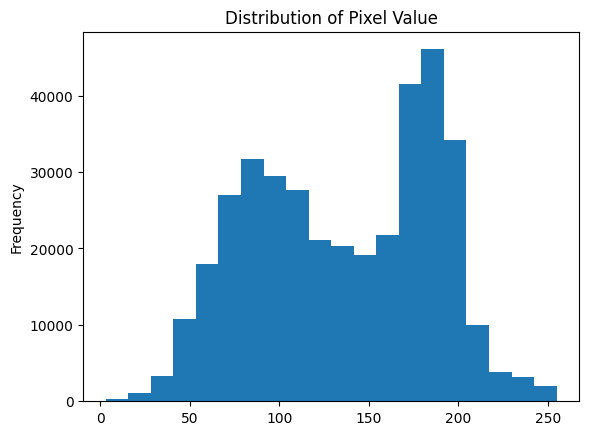

In [13]:
pd.Series(img_mpl.flatten()).plot(kind='hist',bins=20,title='Distribution of Pixel Value')

In [15]:
nor_img=img_mpl/255

- max value of img_mpl is 255(img_mpl.max()) , so divide it by 255 to make it a normal number between 0  and 1

<Axes: title={'center': 'Distribution of Pixel Value'}, ylabel='Frequency'>

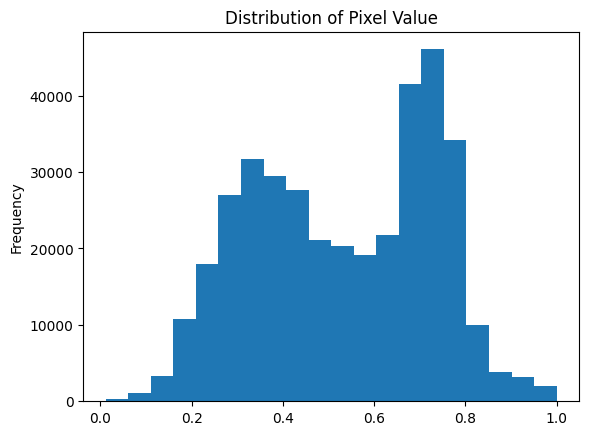

In [18]:
pd.Series(nor_img.flatten()).plot(kind='hist',bins=20,title='Distribution of Pixel Value')

## Display Images

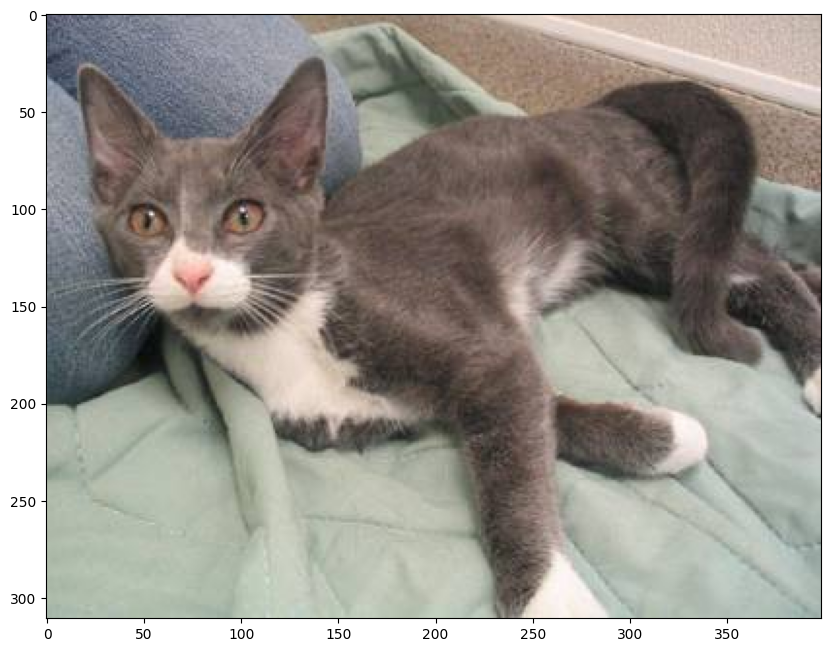

In [21]:
fig,ax=plt.subplots(figsize=(10,10))
ax.imshow(img_mpl)
plt.show()

# Image Channels

In [24]:
img_mpl.shape

(311, 399, 3)

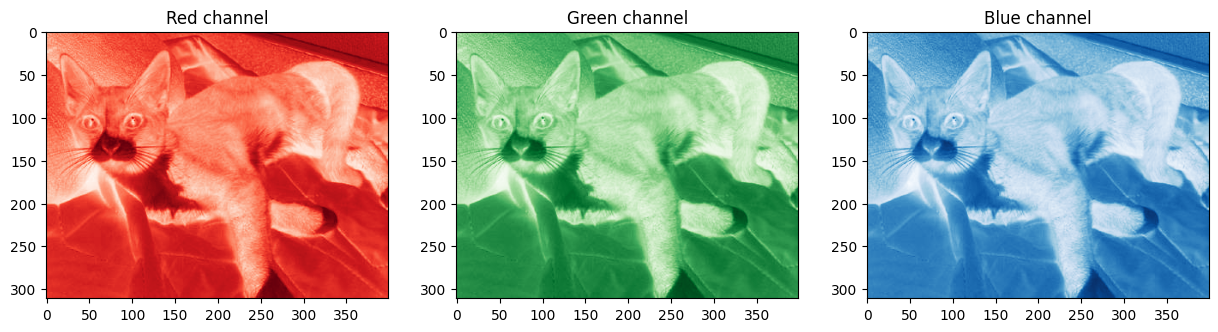

In [26]:
# Display RGB Channels of our image
fig,axs=plt.subplots(1,3,figsize=(15,5))
axs[0].imshow(img_mpl[:,:,0],cmap='Reds')# img_mpl[:,:,0] for only using 1st channel in RED color
axs[1].imshow(img_mpl[:,:,1],cmap='Greens')# img_mpl[:,:,0] for only using 1st channel in GREEN color
axs[2].imshow(img_mpl[:,:,2],cmap='Blues')# img_mpl[:,:,0] for only using 1st channel in BLUE color
axs[0].set_title('Red channel')
axs[1].set_title('Green channel')
axs[2].set_title('Blue channel')
plt.show()

## Matplotlib vs cv2 Numpy Arrays
- cv2 reads  channels as BGR
- matplolib reads  channels as RGB

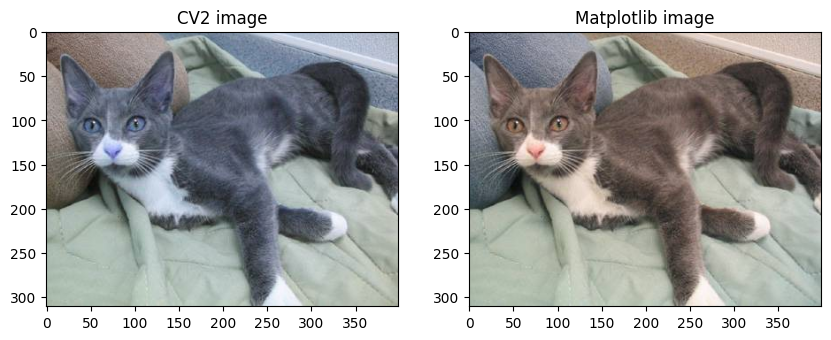

In [29]:
fig,axs=plt.subplots(1,2,figsize=(10,5))
axs[0].imshow(img_cv2)
axs[1].imshow(img_mpl)
axs[0].set_title('CV2 image')
axs[1].set_title('Matplotlib image')
plt.show()

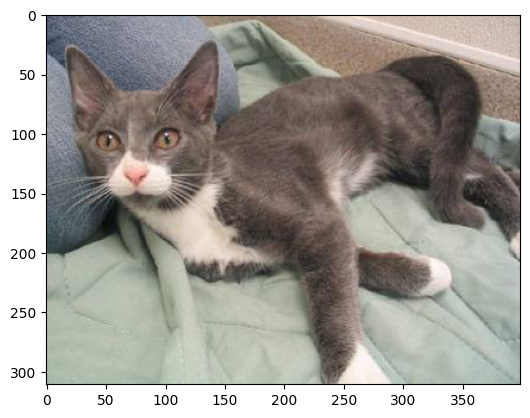

In [31]:
# covertinf from BGR to RGB
img_cv2_rgb=cv2.cvtColor(img_cv2,cv2.COLOR_BGR2RGB)
fig,ax=plt.subplots()
ax.imshow(img_cv2_rgb)
plt.show()

- This image shows that we have converting from BGR to RGB

## IMAGE MANIPULATION

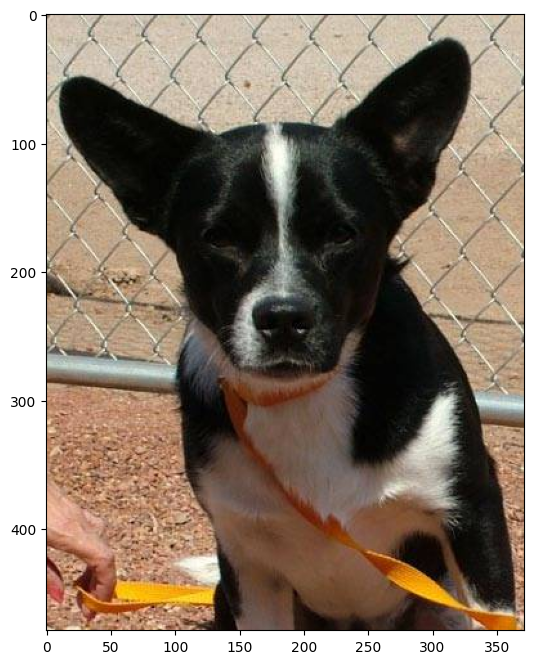

In [63]:
img=plt.imread(dog_files[30])
fig,ax=plt.subplots(figsize=(10,8))
ax.imshow(img)
plt.show()

In [65]:
img_gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
img_gray.shape

(479, 372)

- (430, 475) it is 2D because it has only one channel that's the grey scale channnel
 

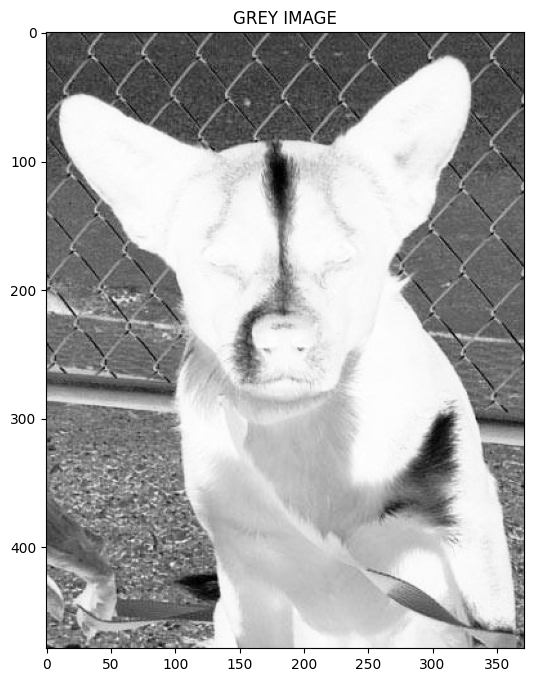

In [68]:
fig,ax=plt.subplots(figsize=(10,8))
ax.imshow(img_gray,cmap='Greys')
ax.set_title('GREY IMAGE')
plt.show()

 #### Why Convert to Grayscale?
   - Converting an image to grayscale simplifies the data by reducing the three color channels (Red, Green, Blue) to a single intensity channel. This is useful in many image processing tasks like edge detection, thresholding, and object detection, where color information is not necessary.

## Resizing and Scaling

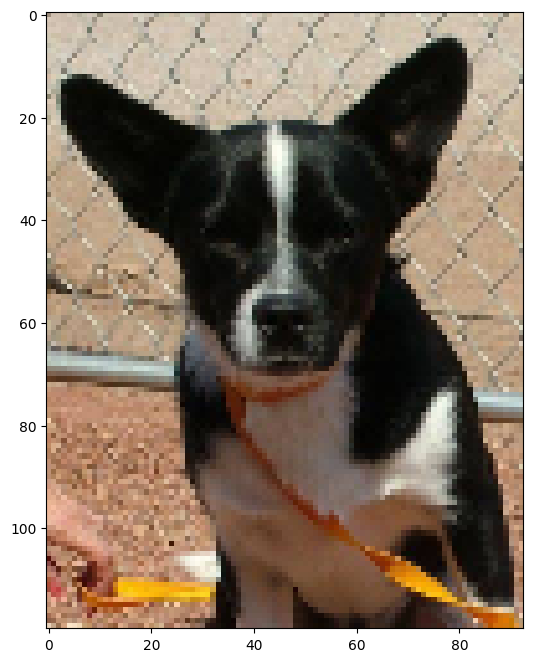

In [74]:
img_resized=cv2.resize(img,None,fx=0.25,fy=0.25)
fig,ax=plt.subplots(figsize=(10,8))
ax.imshow(img_resized)
plt.show()

- Resizes the image img by reducing its width and height to 25% of the original size.
- fx=0.25 and fy=0.25 specify the scaling factors along the x-axis (width) and y-axis (height) respectively.
- The None indicates that no specific output size is provided, so the size is determined by the scaling factors.

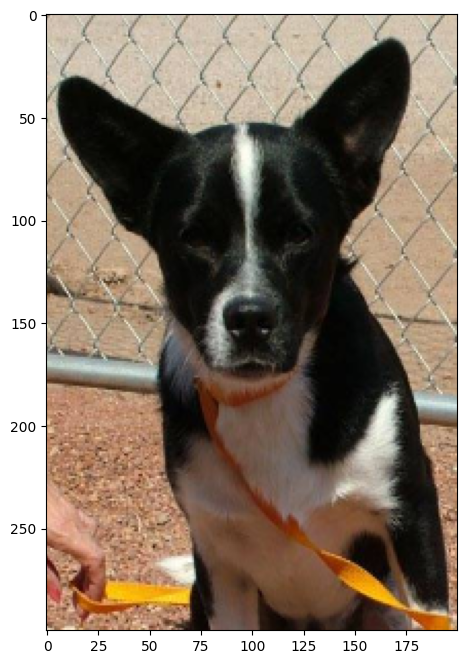

In [115]:
# Specific output size
img_resized = cv2.resize(img, (200, 300))
fig, ax = plt.subplots(figsize=(10, 8))
ax.imshow(img_resized)
plt.show()

- Specific output size with width=200, height=300

In [76]:
img_resized.shape

(120, 93, 3)

## Sharping the Image

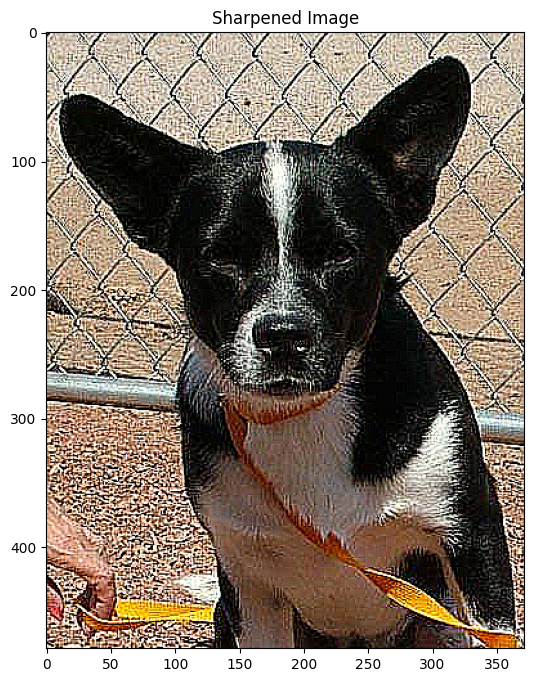

In [124]:
# Sharpen Image
kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1,9,-1], 
                              [-1,-1,-1]])

sharpened = cv2.filter2D(img, -1, kernel_sharpening)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(sharpened)
ax.set_title('Sharpened Image')
plt.show()

- Here filtering the image by using the Kernel

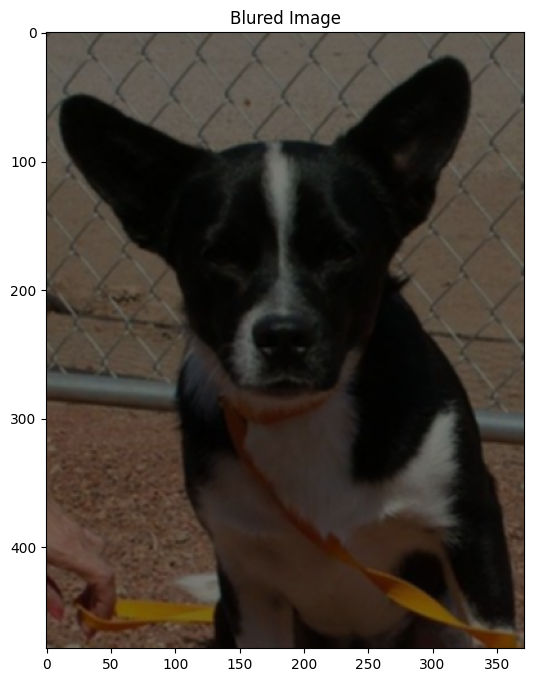

In [100]:
# Bluring the Image
kernel_3=np.ones((3,3),np.float32)/19
blured=cv2.filter2D(img,-1,kernel_3)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(blured)
ax.set_title('Blured Image')
plt.show()

# Save Image

In [136]:
plt.imsave('mpl_dog.png',blured)
cv2.imwrite('mpl_dog.png',blured)#

True

In [140]:
plt.imsave('C:\\Users\\gayat\\Downloads\\kani\\Image_processing\\test_set\\mpl_dog.png',blured)
cv2.imwrite('C:\\Users\\gayat\\Downloads\\kani\\Image_processing\\test_set\\mpl_dog.png',blured)#this processed image store in this path

True

- save the processed image